<a href="https://colab.research.google.com/github/binit24/FlipRobbo-Assignment./blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
f = open("test.csv")

In [79]:
#Reading the Dataset:
df1 = pd.read_csv('test.csv')
print(df1.shape) #checking no of rows and columns in the dataset.
df1.head()

(292, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [80]:
#Reading the Dataset:
df2 = pd.read_csv('train.csv')
print(df2.shape) #checking no of rows and columns in the dataset.
df2.head()

(1168, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [ ]:
#combining the Dataframe and removing duplicates.
df = pd.concat([df1, df2]).drop_duplicates().reset_index(drop=True)
print(df.shape)
df.head()
#There are 1460 rows and 81 d-features in the dataset.

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,...,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,NaN
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,...,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,NaN
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,...,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,NaN
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,...,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,...,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN


In [82]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [83]:
#Checking the datatypes of each feature:
#We are going to train the Model by using Taining Dataset.
df2.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [84]:
#Identifying Categorical and Neumerical Columns:
cols = df2.columns
num_cols = df2._get_numeric_data().columns.to_list()
cat_cols = list(set(cols)-set(num_cols))
print("Neumerical Columns")
print(num_cols)
print("Categorical Columns")
print(cat_cols)

Neumerical Columns
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Columns
['BldgType', 'CentralAir', 'Alley', 'Condition2', 'ExterQual', 'PoolQC', 'SaleCondition', 'RoofStyle', 'KitchenQual', 'BsmtExposure', 'GarageCond', 'SaleType', 'PavedDrive', 'Heating', 'LotConfig', 'Electrical', 'Fence', 'MiscFeature', 'GarageFinish', 'GarageType', 'Exterior1st', 'HeatingQC', 'ExterCond', 'Functional', 'BsmtFinType1', 'MasVnrType', 'Utilities', 'LandContour', 'LotShape', 'Neighborhood', 'Street', 'LandSlope', 'RoofMatl',

In [85]:
#Lets Check for Duplicated Records.
dfd = df2[df2.duplicated()]
dfd.shape
#No Duplicate records found.

(0, 81)

               Total Missing Value
Id                               0
MSSubClass                       0
MSZoning                         0
LotFrontage                    214
LotArea                          0
Street                           0
Alley                         1091
LotShape                         0
LandContour                      0
Utilities                        0
LotConfig                        0
LandSlope                        0
Neighborhood                     0
Condition1                       0
Condition2                       0
BldgType                         0
HouseStyle                       0
OverallQual                      0
OverallCond                      0
YearBuilt                        0
YearRemodAdd                     0
RoofStyle                        0
RoofMatl                         0
Exterior1st                      0
Exterior2nd                      0
MasVnrType                       7
MasVnrArea                       7
ExterQual           

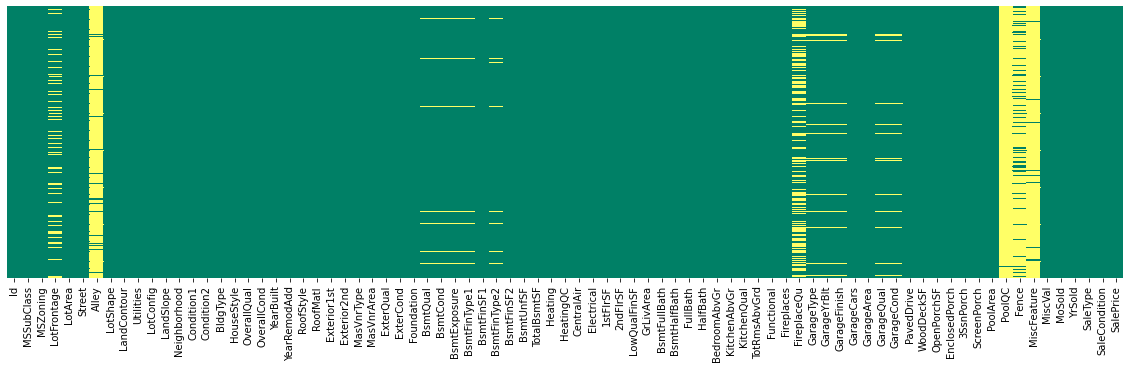

In [86]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df2.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
plt.figure(figsize=(20,5))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='summer')
plt.show()

In [87]:
#Checking the Columns that have Missing Value:
print('Columns having missing values are as follows:')
for i in df2.isnull().any().index:
    if (df2.isnull().any()[i]):
        print(i)

Columns having missing values are as follows:
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [88]:
#Checking the percentage of Missing Values.
print('\nPercentage of missing values in each column Space:')
(df2.isnull().sum() / df2.shape[0]).sort_values(ascending=False)[:20]


Percentage of missing values in each column Space:


PoolQC          0.994007
MiscFeature     0.962329
Alley           0.934075
Fence           0.797089
FireplaceQu     0.471747
LotFrontage     0.183219
GarageType      0.054795
GarageCond      0.054795
GarageYrBlt     0.054795
GarageFinish    0.054795
GarageQual      0.054795
BsmtExposure    0.026541
BsmtFinType2    0.026541
BsmtFinType1    0.025685
BsmtCond        0.025685
BsmtQual        0.025685
MasVnrArea      0.005993
MasVnrType      0.005993
Exterior2nd     0.000000
Exterior1st     0.000000
dtype: float64

In [89]:
#Deleting the columns which have more than 40% of missing records:
df2 = df2.drop('PoolQC', axis=1)
df2 = df2.drop('MiscFeature', axis=1)
df2 = df2.drop('Alley', axis=1)
df2 = df2.drop('Fence',axis=1)
df2 = df2.drop('FireplaceQu',axis=1)

In [90]:
#Lets check the shape again:
df2.shape

(1168, 76)

In [91]:
#Deleting all rows having null values could lead loss of information replacing the neumerical cols with mean:
#Replacing the values by using mean.
for i in df2._get_numeric_data().columns:
  df2[i].fillna(df2[i].mean(),inplace=True)

In [92]:
#we will use simple imputer function from sklearn to remove null values in categorical Columns:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']:
   df2[col] = imp.fit_transform(df2[col].values.reshape(-1,1))

In [93]:
#Again Checking Null Values:
df2.isnull().values.any()
#No more null Values

False

In [94]:
#Checking the percentage of Loss of Information:
print("No. of Rows left = ", df2.shape[0])
print("No. of Rows removed = ", 1168 - df2.shape[0])
print("Percentage of Rows removed = {}%".format(round(100*(1168 - df2.shape[0])/1460,2)))

No. of Rows left =  1168
No. of Rows removed =  0
Percentage of Rows removed = 0.0%


In [95]:
#Checking the value count and unique value of each categorical feature:
for col in df2.columns:
    if df2[col].dtypes == object:
        print(str(col)+':'+str(df2[col].value_counts()))
        print('********************************************')

MSZoning:RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
********************************************
Street:Pave    1164
Grvl       4
Name: Street, dtype: int64
********************************************
LotShape:Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
********************************************
LandContour:Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
********************************************
Utilities:AllPub    1168
Name: Utilities, dtype: int64
********************************************
LotConfig:Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
********************************************
LandSlope:Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
********************************************
Neighborhood:NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilb

In [96]:
#checking the Columns:
columns = list(df2.columns)
print(df2.shape)
print(columns)

(1168, 76)
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 

In [97]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.198559,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.193841,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [98]:
#Most of the columns are right skewed as mean is more than the median.
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.
#Some of the columns are left skewed as median is more than mean.
#All the Houses are built between 1872 to 2010.

In [99]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

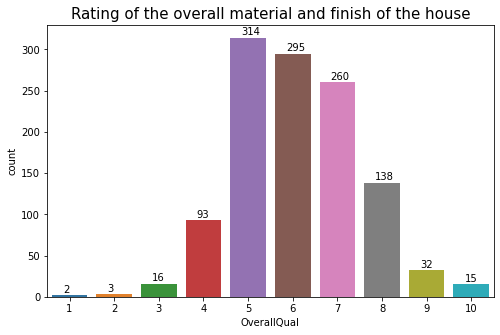

In [100]:
#Univariate Analysis.
plt.figure(figsize=(8,5))
ax = sns.countplot(df2['OverallQual'])
plt.title("Rating of the overall material and finish of the house",fontsize=15)
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')
#15 Houses have received perfect 10 Ratings.
#295 houses have average ratings of 6.
#314 houses have average ratings of 5.
#93 houses have average ratings of 4.

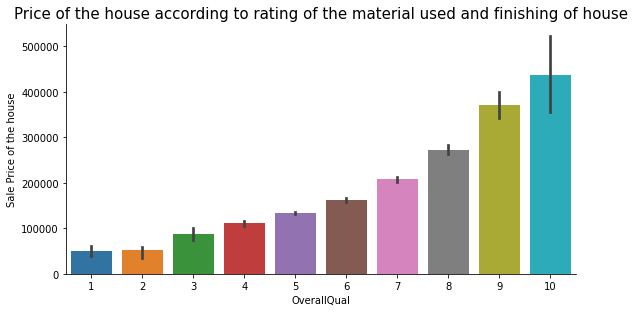

In [101]:
#Bivariate Analysis.
#Checking the relationship between ratings and price.
sns.factorplot(x="OverallQual",y="SalePrice",data=df2,kind="bar",size = 4,aspect=2)
plt.title('Price of the house according to rating of the material used and finishing of house',fontsize=15)
plt.ylabel("Sale Price of the house")
plt.xticks(rotation='horizontal')
plt.show()
#Houses with higher ratings have higher prices.

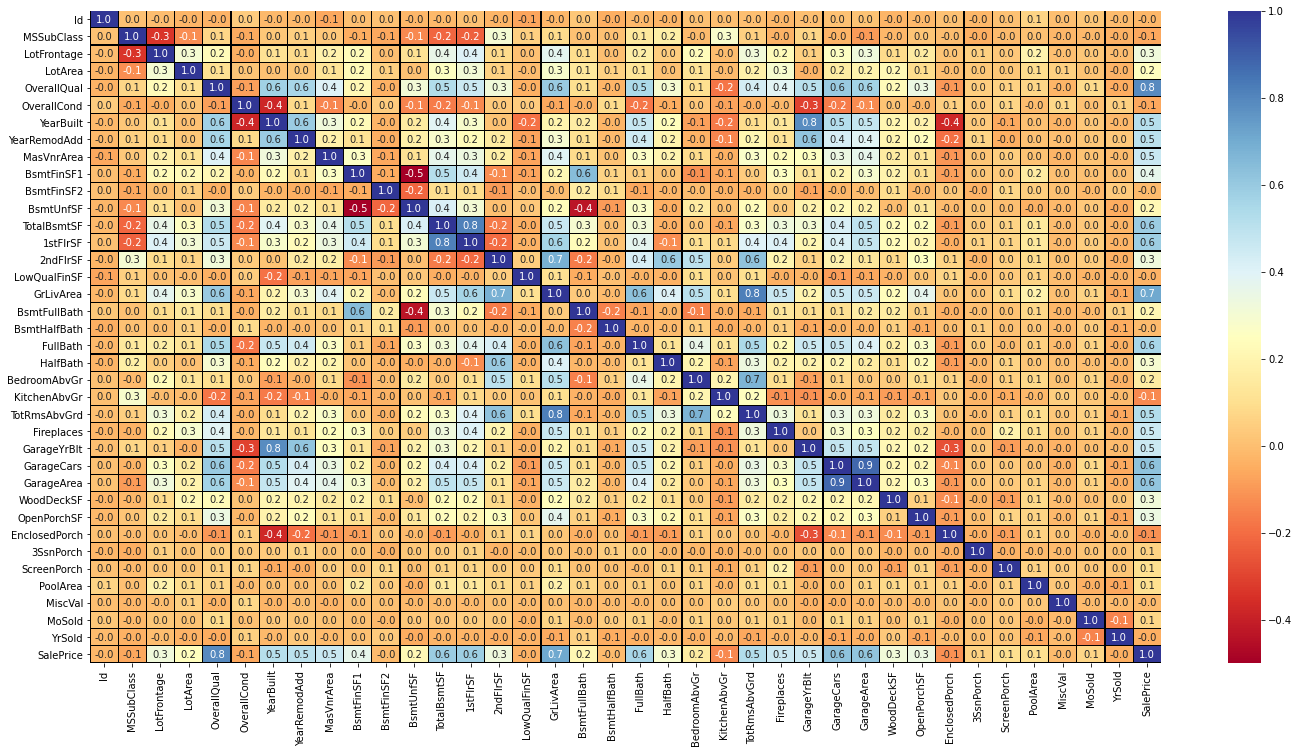

In [102]:
#Lets check for corelation again and remove highly corelated feature as discussed above:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
plt.figure(figsize=(24,12))
sns.heatmap(df2.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="RdYlBu",linecolor="black")
plt.show()

Text(0.5, 1.0, 'corelation with target variable')

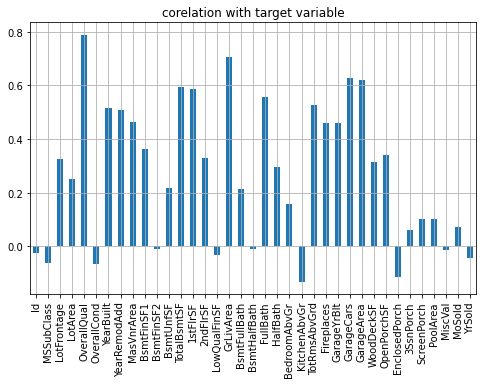

In [103]:
#corelation with target column:
plt.figure(figsize=(8,5))
df2.drop('SalePrice',axis=1).corrwith(df2['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')
#None of the features are corealted with each other.

In [104]:
#Checking neumerical columns:
#Lets create a List Comprehensions.
neumerical_columns = [columns for columns in df2.columns if df2[columns].dtypes != 'O']
print('Length of neumerical columns:',len(neumerical_columns))
#Checking the top 5 rows:
columns = list(df2[neumerical_columns])
print(columns)
#38 neumerical columns features are present.

Length of neumerical columns: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [105]:
#Checking for Temporal Variables known as :
temporal_columns = [columns for columns in neumerical_columns if 'Yr' in columns or 'Year' in columns]
temporal_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

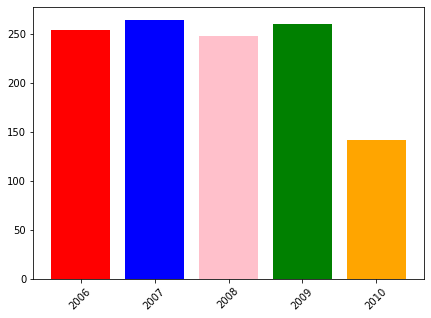

In [106]:
#Plotting a graph and checking in which year highest no of houses are sold:
df2['YrSold'].value_counts()[:5]
plt.figure(figsize=(7,5))
plt.bar(list(df2['YrSold'].value_counts()[:5].keys()),list(df2['YrSold'].value_counts()[:5]),color=["blue","green","red","pink","orange"])
plt.xticks(rotation=45)
plt.show()
#Most of the houses are sold in year 2007 and 2009

In [107]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [108]:
#Cheking the count of skewed featues.
print("Total count of numeric features: ",len(df2.skew()))
print("count of features which are significantly skewed: ",len(df2.skew().loc[abs(df2.skew())>0.5]))
df2.skew()

Total count of numeric features:  38
count of features which are significantly skewed:  29


Id                0.026526
MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

In [109]:
import scipy.stats as stat
import pylab

In [110]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df2,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df2[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df2[feature],dist='norm',plot=pylab)
    plt.show()

<Figure size 360x360 with 0 Axes>

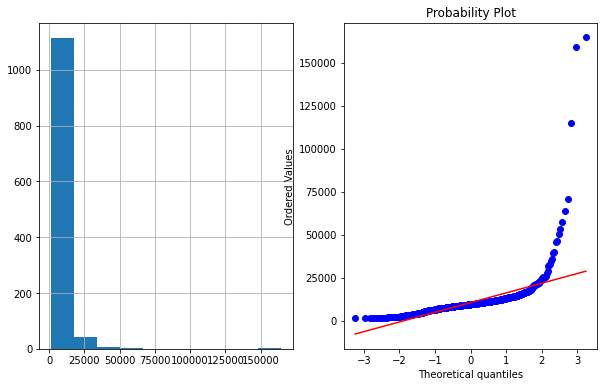

In [111]:
#We can check for skewness by using Distrution plot:
plt.figure(figsize=(5,5))
plot_data(df2,'LotArea')

<Figure size 360x360 with 0 Axes>

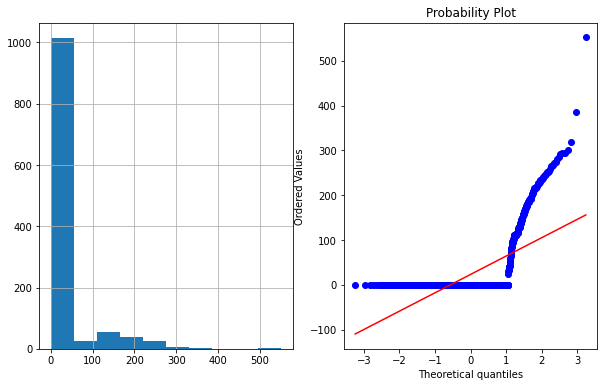

In [112]:
#We can check for skewness by using Distrution plot:
plt.figure(figsize=(5,5))
plot_data(df2,'EnclosedPorch')

In [113]:
#We can see that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.
#We will use Zscore to remove outliers and some of the skewness.

In [114]:
#Checking Categorical Columns
categorical_columns = [columns for columns in df2.columns if df2[columns].dtypes=='O']
columns = list(categorical_columns)
print(columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [115]:
#Lets convert Categorical into neumerical:
for feature in categorical_columns:
    temp = df2.groupby(feature)['SalePrice'].count()/len(df2)
    temp_df = temp[temp>0.01].index
    df2[feature] = np.where(df2[feature].isin(temp_df),df2[feature],'rare_var')

In [116]:
#Converting Categorical into neumerical column:
for feature in categorical_columns:
    labels = df2.groupby([feature])['SalePrice'].mean().sort_values().index
    labels = {k:i for i,k in enumerate(labels,0)}
    df2[feature] = df2[feature].map(labels)

In [117]:
#Checking the head and shape.
print(df2.shape)
df2.head()

(1168, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.98847,4928,1,1,1,0,1,0,6,2,1,4,4,6,5,1976,1976,1,0,6,6,1,0.0,1,2,2,2,2,0,3,120,3,0,958,1078,2,2,1,3,958,0,0,958,0,0,2,0,2,1,1,5,4,1,3,1977.0,1,2,440,1,2,2,0,205,0,0,0,0,0,2,2007,2,4,128000
1,889,20,3,95.00000,15865,1,1,1,0,1,1,7,2,1,3,4,8,6,1970,1970,2,1,2,2,1,0.0,2,1,4,1,3,3,3,351,1,823,1043,2217,2,4,1,3,2217,0,0,2217,1,0,2,0,4,1,2,8,4,1,3,1970.0,0,2,621,1,2,2,81,207,0,0,224,0,0,10,2007,2,4,268000
2,793,60,3,92.00000,9920,1,1,1,0,4,0,20,2,1,3,6,7,5,1996,1997,1,0,1,1,1,0.0,2,2,4,2,2,2,5,862,3,0,255,1117,2,4,1,3,1127,886,0,2013,1,0,2,1,3,1,1,8,4,1,3,1997.0,0,2,455,1,2,2,180,130,0,0,0,0,0,6,2007,2,4,269790
3,110,20,3,105.00000,11751,1,1,1,0,1,0,10,2,1,3,4,6,6,1977,1977,3,0,6,6,2,480.0,1,2,2,2,2,0,2,705,3,0,1139,1844,2,4,1,3,1844,0,0,1844,0,0,2,0,3,1,1,7,4,1,3,1977.0,1,2,546,1,2,2,0,122,0,0,0,0,0,1,2010,0,4,190000
4,422,20,3,70.98847,16635,1,1,1,0,0,0,10,2,1,3,4,6,7,1977,2000,1,0,10,10,3,126.0,2,2,2,2,2,0,3,1246,3,0,356,1602,2,3,1,3,1602,0,0,1602,0,1,2,0,3,1,2,8,4,1,3,1977.0,2,2,529,1,2,2,240,0,0,0,0,0,0,6,2009,2,4,215000


In [118]:
#Checking the columns again:
columns = list(df2.columns)
print("List of all columns:",columns)

List of all columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 

In [119]:
#Using Min Max Scaler: Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
neumerical = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
df_minmax_transform = pd.DataFrame(data = df2)
df_minmax_transform[neumerical] = scaler.fit_transform(df_minmax_transform[neumerical])
df_minmax_transform.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,0.588235,0.75,0.171193,0.022209,1.0,0.333333,0.333333,0.0,0.25,0.0,0.30,0.4,1.0,1.00,0.666667,0.555556,0.500,0.748148,0.433333,0.333333,0.0,0.6,0.6,0.333333,0.00000,0.333333,0.666667,0.5,0.666667,0.666667,0.000000,0.6,0.021262,0.6,0.000000,0.410103,0.176432,1.0,0.50,1.0,1.0,0.143185,0.000000,0.0,0.117558,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.333333,0.75,0.700000,0.5,0.5,0.310296,0.5,1.0,1.0,0.000000,0.374771,0.0,0.0,0.000000,0.0,0.0,0.090909,0.25,0.666667,0.8,128000
1,889,0.000000,0.75,0.253425,0.089159,1.0,0.333333,0.333333,0.0,0.25,0.5,0.35,0.4,1.0,0.75,0.666667,0.777778,0.625,0.703704,0.333333,0.666667,1.0,0.2,0.2,0.333333,0.00000,0.666667,0.333333,1.0,0.333333,1.000000,1.000000,0.6,0.062190,0.2,0.558345,0.446490,0.362848,1.0,1.00,1.0,1.0,0.432079,0.000000,0.0,0.354748,0.333333,0.0,0.666667,0.0,0.500,0.333333,0.666667,0.500000,1.0,0.333333,0.75,0.636364,0.0,0.5,0.437941,0.5,1.0,1.0,0.094516,0.378428,0.0,0.0,0.466667,0.0,0.0,0.818182,0.25,0.666667,0.8,268000
2,793,0.235294,0.75,0.243151,0.052767,1.0,0.333333,0.333333,0.0,1.00,0.0,1.00,0.4,1.0,0.75,1.000000,0.666667,0.500,0.896296,0.783333,0.333333,0.0,0.1,0.1,0.333333,0.00000,0.666667,0.666667,1.0,0.666667,0.666667,0.666667,1.0,0.152729,0.6,0.000000,0.109161,0.182815,1.0,1.00,1.0,1.0,0.181964,0.429056,0.0,0.316315,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.500000,1.0,0.333333,0.75,0.881818,0.0,0.5,0.320874,0.5,1.0,1.0,0.210035,0.237660,0.0,0.0,0.000000,0.0,0.0,0.454545,0.25,0.666667,0.8,269790
3,110,0.000000,0.75,0.287671,0.063975,1.0,0.333333,0.333333,0.0,0.25,0.0,0.50,0.4,1.0,0.75,0.666667,0.555556,0.625,0.755556,0.450000,1.000000,0.0,0.6,0.6,0.666667,0.30000,0.333333,0.666667,0.5,0.666667,0.666667,0.000000,0.4,0.124911,0.6,0.000000,0.487586,0.301800,1.0,1.00,1.0,1.0,0.346489,0.000000,0.0,0.284476,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.75,0.700000,0.5,0.5,0.385049,0.5,1.0,1.0,0.000000,0.223035,0.0,0.0,0.000000,0.0,0.0,0.000000,1.00,0.000000,0.8,190000
4,422,0.000000,0.75,0.171193,0.093872,1.0,0.333333,0.333333,0.0,0.00,0.0,0.50,0.4,1.0,0.75,0.666667,0.555556,0.750,0.755556,0.833333,0.333333,0.0,1.0,1.0,1.000000,0.07875,0.666667,0.666667,0.5,0.666667,0.666667,0.000000,0.6,0.220765,0.6,0.000000,0.152397,0.262193,1.0,0.75,1.0,1.0,0.290959,0.000000,0.0,0.238885,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.666667,0.500000,1.0,0.333333,0.75,0.700000,1.0,0.5,0.373061,0.5,1.0,1.0,0.280047,0.000000,0.0,0.0,0.000000,0.0,0.0,0.454545,0.75,0.666667,0.8,215000


In [120]:
#We can see above that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine or we can also use Boxcox Method.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.
for col in df2.columns:
        if df2.skew().loc[col]>0.55:
            df2[col] = np.log1p(df2[col])

In [121]:
#Creating a copy of our dataset
df1 = df2.copy()

In [122]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df1))
print("Before removal of outliers:",df1.shape)
df1_final = df1.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df1_final.shape)

Before removal of outliers: (1168, 76)
After removal of outliers: (0, 76)


In [125]:
#We are lossing 100% of imformation after removing outliers hence we are not going to remove outliers.

In [126]:
#Creating independent and Dependent Variable:
columns = df2.columns.tolist()
#Filter the column and remove data we dont want:
columns = [c for c in columns if c not in ['SalePrice','Id']]
#Store the variable we are predicting:
target = "SalePrice"
#Define a random state:
state = np.random.RandomState(42)
X = df2[columns]
y = df2[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0],X.shape[1]))
print(X.shape)
print(y.shape)

(1168, 74)
(1168,)


In [130]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=55)

In [131]:
#Importing the Model for Predictions Process:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
#Import Error Metrics:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [129]:
model = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for m in model:
    m.fit(X_train,y_train)
    print("Score of",m, "is:",m.score(X_train,y_train))
    y_predict = m.predict(X_test)
    print("Error:")
    print('Mean absolute error:',mean_absolute_error(y_test,y_predict))
    print('Mean squared error:',mean_squared_error(y_test,y_predict))
    print('Root mean squared is ',np.sqrt(mean_squared_error(y_test,y_predict)))
    print('r2 score is:',r2_score(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.9111804268279392
Error:
Mean absolute error: 0.09709215026051668
Mean squared error: 0.019218113336648964
Root mean squared is  0.13862941007105586
r2 score is: 0.8770962090080674
******************************************************************


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is: 0.5498179317577907
Error:
Mean absolute error: 0.19704089425991933
Mean squared error: 0.07208414693569445
Root mean squared is  0.26848491007074204
r2 score is: 0.5390070412415857
******************************************************************


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is: 0.910839180949235
Error:
Mean absolute error: 0.09

In [132]:
#Lets Check with Linear Regression:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.8712139651965929
standard deviation in r2_score for linear Regression: 0.031762260726685525


In [134]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.10761371157362065
MSE: 0.023656683066950342
RMSE: 0.15380729198237106


In [135]:
#Lets Ckeck with Lasso Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [136]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=lasso,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [137]:
#Fetching best alpha value:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.8848665034723876


In [138]:
#Using Best alpha value:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").std())

mean r2_score for Lasso Regression: 0.8798584639411974
standard deviation in r2_score for lasso Regression: 0.02907703305356782


In [140]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.10761371157362065
MSE: 0.023656683066950342
RMSE: 0.15380729198237106


In [141]:
#Lets Ckeck with Ridge Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [142]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=ridge,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [143]:
#Fetching best alpha value:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1}
0.8831561682433821


In [144]:
#Using Best alpha value:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [145]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").std())

mean r2_score for Ridge Regression: 0.8749342553950443
standard deviation in r2_score for Ridge Regression: 0.03063707133448096


In [146]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.10761371157362065
MSE: 0.023656683066950342
RMSE: 0.15380729198237106


In [147]:
#Lets Try with Random Forest:

In [152]:
#Lets perform Hyperparametre Tuning and check the Results:
from sklearn.model_selection import RandomizedSearchCV
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [153]:
#Hyperparametre Tuning by using RandomizedSearch CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [154]:
#Create the random grid and input the values:
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [163]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [164]:
#Lets Fit Our Model:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=25,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                               

In [165]:
#Fetching Best Parametre
print(rf_random.best_params_)

{'n_estimators': 1100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [167]:
#Importing Alogorithim and initializing values:
reg_rf = RandomForestRegressor(max_depth=15,max_features='sqrt',min_samples_leaf=2,min_samples_split=10,n_estimators=1100)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [168]:
#Doing Predictions
prediction = reg_rf.predict(X_test)

In [169]:
#Checking Scores:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.10590742872693278
MSE: 0.024356829399626
RMSE: 0.15606674661703562


In [170]:
#Checking r2 Score.
metrics.r2_score(y_test, prediction)

0.8442330619390669

In [171]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Random Forest Regression:",cross_val_score(reg_rf,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Random Forest Regression:",cross_val_score(reg_rf,X,y,cv=5,scoring="r2").std())

mean r2_score for Random Forest Regression: 0.8601074967738878
standard deviation in r2_score for Random Forest Regression: 0.023263306003555577


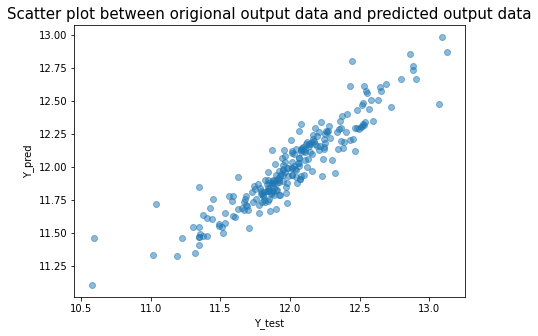

In [176]:
#Scatter plot between origional output data and predicted output data for Randomforest Regressor.
plt.figure(figsize=(7,5))
plt.scatter(y_test, reg_rf.predict(X_test), alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between origional output data and predicted output data",fontsize=15)
plt.show()

In [177]:
#Saving the best Model for future predictions:
import joblib
joblib.dump(lr,'lasso.obj')
reg_rf_from_joblib = joblib.load('lasso.obj')
reg_rf_from_joblib.predict(X_test)[:20]

array([12.20486671, 12.2146903 , 11.38286874, 12.20950531, 12.62921726,
       12.36577204, 11.67328106, 11.85733867, 12.15091194, 12.18811061,
       11.99983284, 12.30160712, 11.94069109, 11.89093355, 12.51068238,
       12.53994586, 12.23608879, 12.23221589, 12.06212109, 11.899844  ])